<a href="https://colab.research.google.com/github/RTVIENNA/1450-RAG-Preprocessing/blob/main/God_of_ducks_and_lamas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The 1450 Navigator 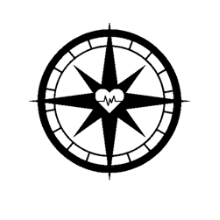

# 🕵🏻 Agentic RAG with 🦙 Llama 3.2 3B

# The running ducks and the smart LAMA


Make sure that the T4 GPU is running

In [1]:
! pip install docling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.2/160.2 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.1/541.1 kB 36.1 MB/s eta 0:00:00
   ━

In [2]:
! pip install haystack-ai duckduckgo-api-haystack transformers sentence-transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.6/451.6 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 32.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
  Attempting uninstall: dill
    Found existing installation: dill 0.3.9
    Uninstalling dill-0.3.9:
      Successfully u

In [3]:
import os #3
from transformers import AutoModelForSequenceClassification #3

import gdown #4
from docling.document_converter import DocumentConverter #4
from haystack import Document #4
from haystack.document_stores.in_memory import InMemoryDocumentStore #4
from haystack.components.embedders import SentenceTransformersDocumentEmbedder #4

import torch #6
from haystack.components.generators import HuggingFaceLocalGenerator #6

from haystack.components.embedders import SentenceTransformersTextEmbedder #8
from haystack.components.retrievers.in_memory import InMemoryEmbeddingRetriever #8

from haystack.components.builders import PromptBuilder #9

from haystack.components.routers import ConditionalRouter #10

from duckduckgo_api_haystack import DuckduckgoApiWebSearch #11

from haystack.components.joiners import BranchJoiner #14
prompt_joiner  = BranchJoiner(str)

from haystack import Pipeline #14



In [6]:
token = os.environ.get("HUGGING_FACE_HUB_TOKEN")

# Now you can use the 'token' variable when interacting with the Hugging Face Hub
# For example, when using the 'transformers' library:

from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", use_auth_token=token)
#bert-base-uncased

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
# 1. Download files from Google Drive
url = "https://drive.google.com/drive/u/0/folders/1YrBIqbbi5uXjR-fuEAMBHL-TwpjtViXu"
output_dir = "1450_files"
gdown.download_folder(url, quiet=True, output=output_dir)

# 2. Process each downloaded file
import os
for filename in os.listdir(output_dir):
    if filename.endswith(".pdf"):  # Adjust file extension if needed
        filepath = os.path.join(output_dir, filename)

        # 3. Convert the PDF file
        converter = DocumentConverter()
        result = converter.convert(filepath)
        converted_text = result.document.export_to_markdown()
        print(result.document.export_to_markdown())

        # 4. Create a Haystack Document object
        doc = Document(content=converted_text, meta={"source": filepath})

<!-- image -->

Notaufnahmen Campus Charité Mitte und Campus Virchow-Klinikum | CCM | CVK

Startseite  Notfallversorgung  Manchester Triage System

## Manchester Triage System

Triage bedeutet Ersteinschätzung.

Eine medizinische Fachkraft beurteilt nach einem standardisierten Vorgehen die Dringlichkeit der Behandlung.

<!-- image -->

## Das Manchester Triage System Ersteinschätzung der Behandlungsdringlichkeit

Das Manchester Triage System (MTS) ist ein standardisiertes Verfahren zur systematischen Ersteinschätzung bzw. Triage der Behandlungsdringlichkeit von Patienten in Rettungs-stellen bzw. Notaufnahmen. Triage bezeichnet dabei die Methodik, den Schweregrad der Erkrankung bzw. der Verletzung innerhalb kurzer Zeit zu erkennen und mittels Kategorisierung eine Einstufung der Behandlungsdringlichkeit vorzunehmen. Die schnelle und sichere Festlegung der Behandlungspriorität ist eine Grundvoraussetzung, um bei begrenzten Ressourcen eine dringliche notwendige medizinische Behandlung gg

In [8]:
# 3. Einrichten des In-Memory-Dokumentenspeichers
document_store = InMemoryDocumentStore()

# 4. Initialisieren und Aufwärmen des Document Embedder
doc_embedder = SentenceTransformersDocumentEmbedder(model="sentence-transformers/all-MiniLM-L6-v2")
doc_embedder.warm_up()

# 5. Embedding des Dokuments und Schreiben in den Dokumentenspeicher
docs_with_embeddings = doc_embedder.run([doc])
document_store.write_documents(docs_with_embeddings["documents"])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

1

In [9]:
import getpass, os

os.environ["HF_TOKEN"] = getpass.getpass("Your Hugging Face token")

Your Hugging Face token··········


In [10]:
generator = HuggingFaceLocalGenerator(
    model="meta-llama/Llama-3.2-3B-Instruct",
    huggingface_pipeline_kwargs={"device_map":"auto",
                                 "torch_dtype":torch.bfloat16},
    generation_kwargs={"max_new_tokens": 256})

generator.warm_up()

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0


In [11]:
prompt = """<|begin_of_text|><|start_header_id|>user<|end_header_id|>
  What is the manchester Triage Algorithm?<|eot_id|>
  <|start_header_id|>assistant<|end_header_id|>"""

generator.run(prompt)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


{'replies': ["\n\nThe Manchester Triage Algorithm is a widely used method for prioritizing patients in emergency departments, particularly in hospital settings. It was first developed in the 1970s by Dr. Anthony T. Moore, a British emergency physician, and is still used today. The algorithm is designed to help emergency department staff quickly assess the severity of a patient's condition and allocate them to the most appropriate treatment area or level of care.\n\nThe Manchester Triage Algorithm uses a simple, color-coded system to categorize patients into four levels of priority:\n\n**Level 1: Red (Immediate Attention Required)**\n\n* Patients who are critically ill or injured, requiring immediate medical attention, such as:\n\n  - Cardiac arrest\n  - Severe trauma\n  - Severe bleeding\n  - Severe allergic reactions\n  - Severe chest pain\n  - Severe neurological deficits\n\n**Level 2: Yellow (Urgent Attention Required)**\n\n* Patients who require prompt attention but are not critica

In [13]:
text_embedder = SentenceTransformersTextEmbedder(model="sentence-transformers/all-MiniLM-L6-v2")
retriever = InMemoryEmbeddingRetriever(document_store, top_k=5)

In [12]:
prompt_template = """
<|begin_of_text|><|start_header_id|>user<|end_header_id|>

Answer the following query given the documents.
If the answer is not contained within the documents reply with 'no_answer'.
If the answer is contained within the documents, start the answer with "FROM THE KNOWLEDGE BASE: ".

Documents:
{% for document in documents %}
  {{document.content}}
{% endfor %}

Query: {{query}}<|eot_id|>

<|start_header_id|>assistant<|end_header_id|>
"""

prompt_builder = PromptBuilder(template=prompt_template)

In [14]:
routes = [
    {
        "condition": "{{'no_answer' in replies[0]}}",
        "output": "{{query}}",
        "output_name": "go_to_websearch",
        "output_type": str,
    },
    {
        "condition": "{{'no_answer' not in replies[0]}}",
        "output": "{{replies[0]}}",
        "output_name": "answer",
        "output_type": str,
    },
]

router = ConditionalRouter(routes)

In [15]:
router.run(replies=["this is the answer!"])

{'answer': 'this is the answer!'}

In [16]:
router.run(replies=["no_answer"], query="my query")

{'go_to_websearch': 'my query'}

In [17]:
websearch = DuckduckgoApiWebSearch(top_k=5)

In [18]:
# Perform a search
results = websearch.run(query="Triage Algortihm?")

# Access the search results
documents = results["documents"]
links = results["links"]

print("Found documents:")
for doc in documents:
    print(f"Content: {doc.content}")

print("\nSearch Links:")
for link in links:
    print(link)

/usr/local/lib/python3.11/dist-packages/duckduckgo_api_haystack/duckduckgoapi.py:176: UserWarning: backend='api' is deprecated, using backend='auto'
  results = self.ddgs.text(**payload)


Found documents:
Content: At present START remains the most commonly used mass casualty triage algorithm in the US. top of page. References. Benson M, Koenig KL, Schultz CH. Disaster triage: START, then SAVE-a new method of dynamic triage for victims of a catastrophic earthquake. Prehospital Disaster Med. 1996; Apr-Jun; 11(2): 117-24 [PubMed Citation]
Content: START Triage Algorithm (Bhalla, 2015) []Since the capillary filling criterion in the dark and cold environments in emergencies and disasters is not an appropriate reflection of the circulatory system, this criterion has been omitted in the modified model of the triage system (MSTART) ().The only therapeutic measures allowed in this method are opening the airway of the patient and controlling ...
Content: The type of triage system a hospital uses will be different from the system used by emergency medical technicians or in disaster situations. Technological advances are changing how triage works. Telehealth gives more people acces

In [19]:
prompt_template_after_websearch = """
<|begin_of_text|><|start_header_id|>user<|end_header_id|>

Answer the following query given the documents retrieved from the web.
Start the answer with "FROM THE WEB: ".

Documents:
{% for document in documents %}
  {{document.content}}
{% endfor %}

Query: {{query}}<|eot_id|>

<|start_header_id|>assistant<|end_header_id|>
"""

prompt_builder_after_websearch = PromptBuilder(template=prompt_template_after_websearch)

In [20]:
prompt_joiner  = BranchJoiner(str)

In [21]:
pipe = Pipeline()
pipe.add_component("text_embedder", text_embedder)
pipe.add_component("retriever", retriever)
pipe.add_component("prompt_builder", prompt_builder)
pipe.add_component("prompt_joiner", prompt_joiner)
pipe.add_component("llm", generator)
pipe.add_component("router", router)
pipe.add_component("websearch", websearch)
pipe.add_component("prompt_builder_after_websearch", prompt_builder_after_websearch)

pipe.connect("text_embedder", "retriever")
pipe.connect("retriever", "prompt_builder.documents")
pipe.connect("prompt_builder", "prompt_joiner")
pipe.connect("prompt_joiner", "llm")
pipe.connect("llm.replies", "router.replies")
pipe.connect("router.go_to_websearch", "websearch.query")
pipe.connect("router.go_to_websearch", "prompt_builder_after_websearch.query")
pipe.connect("websearch.documents", "prompt_builder_after_websearch.documents")
pipe.connect("prompt_builder_after_websearch", "prompt_joiner")

🚅 Components
  - text_embedder: SentenceTransformersTextEmbedder
  - retriever: InMemoryEmbeddingRetriever
  - prompt_builder: PromptBuilder
  - prompt_joiner: BranchJoiner
  - llm: HuggingFaceLocalGenerator
  - router: ConditionalRouter
  - websearch: DuckduckgoApiWebSearch
  - prompt_builder_after_websearch: PromptBuilder
🛤️ Connections
  - text_embedder.embedding -> retriever.query_embedding (List[float])
  - retriever.documents -> prompt_builder.documents (List[Document])
  - prompt_builder.prompt -> prompt_joiner.value (str)
  - prompt_joiner.value -> llm.prompt (str)
  - llm.replies -> router.replies (List[str])
  - router.go_to_websearch -> websearch.query (str)
  - router.go_to_websearch -> prompt_builder_after_websearch.query (str)
  - websearch.documents -> prompt_builder_after_websearch.documents (List[Document])
  - prompt_builder_after_websearch.prompt -> prompt_joiner.value (str)

In [22]:
def get_answer(query):
  result = pipe.run({"text_embedder": {"text": query}, "prompt_builder": {"query": query}, "router": {"query": query}})
  print(result["router"]["answer"])

In [23]:
query = "What is the Manchester Triage Algorithm ?"

get_answer(query)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.




FROM THE KNOWLEDGE BASE: The Manchester Triage System (MTS) is a validated and widely used instrument for assessing the urgency of patient care, used in the emergency department to prioritize patients. It is a symptom-oriented system that focuses on the current symptoms presented by the patient, rather than the underlying diagnosis. The MTS assigns patients to one of five levels of urgency, with corresponding time limits for the doctor's first contact. The levels are: 

- Level 1: Red (immediate attention required)
- Level 2: Orange (urgent, but not immediately life-threatening)
- Level 3: Yellow (urgently needed, but not immediately life-threatening)
- Level 4: Green (non-urgent)
- Level 5: Blue (non-urgent, but can wait)

The MTS is used to ensure that patients receive the right level of care, and that the doctor's time is used efficiently. It is used in various hospitals and has been adopted as a standard in some countries.


In [24]:
query = "I have fever, what should I do ?"

get_answer(query)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
/usr/local/lib/python3.11/dist-packages/duckduckgo_api_haystack/duckduckgoapi.py:176: UserWarning: backend='api' is deprecated, using backend='auto'
  results = self.ddgs.text(**payload)
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.




FROM THE WEB: If you have a fever, the general advice is to avoid certain things, such as caffeine, sugary soda, energy drinks, and sports drinks, as they can cause nausea and vomiting. You should also avoid taking cold baths or showers. Additionally, do not use alcohol rubdowns, as they are ineffective in reducing fever and may cause other issues. However, if you have a fever over 104°F (40°C) or with certain symptoms like seizures, loss of consciousness, or severe pain, you should seek medical help right away.
